In [1]:
# Dependencies
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json
import time

In [2]:
#from citipy, retrieve list of cities based on lat and long 
list_of_cities = []
counter = 0
Duplicates  = 'no'
starting_lat = -90
starting_lng = -180
while counter <= 600:
    for x in range(-90,90,4):
        for y in range(-180,180,10):
            if counter > 600: continue   
            city = cp.nearest_city(x, y)
            citdict = {}
            citdict['city'] = city.city_name
            citdict['country'] = city.country_code
            citdict['lat'] = x
            citdict['long'] = y
            if len(list_of_cities) == 0:
                list_of_cities.append(citdict)
                counter+=1
                continue
            else:
            #Get rid of duplicates
                for city in list_of_cities:
                    if city['city'] == citdict['city']:
                        Duplicates = 'yes'
            if Duplicates == 'no':
                list_of_cities.append(citdict)
                counter+=1
            else:
                Duplicates = 'no'

print(len(list_of_cities))  

601


In [3]:
print(list_of_cities[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [4]:
#Creating dataframe of 600 cities
cities_df = pd.DataFrame({
    'city': [x['city'] for x in list_of_cities],
    'country': [x['country'] for x in list_of_cities],
})

In [5]:
cities_sample = cities_df.sample(550)
cities_sample

,city,country
171,ambilobe,mg
0,vaini,to
477,aksu,cn
471,fushe-arrez,al
524,ozinki,ru
510,brandon,ca
521,wieliczka,pl
581,kedrovyy,ru
460,susanville,us
559,kurumkan,ru


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = '7806ba238e6261a7592a464fdca9176b'

In [7]:
units = "Imperial"
count = 0
cities_sample['latitude'] = ""
cities_sample['longitude'] = ""
cities_sample['temperature'] = ""
cities_sample['humidity'] = ""
cities_sample['cloudiness'] = ""
cities_sample['wind_speed'] = ""

for index,row in cities_sample.iterrows():
    count+= 1
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#setting the values extracted for url
        cities_sample.set_value(index, "latitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "longitude", int(cityweather['coord']['lat']))
        cities_sample.set_value(index, "temperature", int(cityweather['main']['temp']))
        cities_sample.set_value(index, "humidity", int(cityweather['main']['humidity']))
        cities_sample.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        cities_sample.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

This is city#: 1
This is: ambilobe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ambilobe
This is city#: 2
This is: vaini
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=vaini
This is city#: 3
This is: aksu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=aksu
This is city#: 4
This is: fushe-arrez
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=fushe-arrez
This is city#: 5
This is: ozinki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ozinki
This is city#: 6
This is: brandon
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9

This is city#: 47
This is: saurimo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=saurimo
This is city#: 48
This is: merauke
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=merauke
No data for this city: yaan
This is city#: 49
This is: yaan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=yaan
This is city#: 50
This is: ponta do sol
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ponta do sol
This is city#: 51
This is: hailar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=hailar
This is city#: 52
This is: boa vista
This is the requested URL: http://api.openweathermap.org/data/2.5/we

This is city#: 93
This is: ternate
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ternate
This is city#: 94
This is: lata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=lata
This is city#: 95
This is: thunder bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=thunder bay
This is city#: 96
This is: peterhead
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=peterhead
No data for this city: attawapiskat
This is city#: 97
This is: attawapiskat
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=attawapiskat
This is city#: 98
This is: gold coast
This is the requested URL: http://api.openwea

This is city#: 138
This is: kiunga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kiunga
This is city#: 139
This is: luena
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=luena
This is city#: 140
This is: beitbridge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=beitbridge
This is city#: 141
This is: kimbe
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kimbe
This is city#: 142
This is: pangkalanbuun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=pangkalanbuun
This is city#: 143
This is: goiatuba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806b

This is city#: 183
This is: kulevcha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=kulevcha
This is city#: 184
This is: awjilah
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=awjilah
This is city#: 185
This is: namatanai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=namatanai
This is city#: 186
This is: port-gentil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=port-gentil
This is city#: 187
This is: viedma
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=viedma
This is city#: 188
This is: hokitika
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7

This is city#: 228
This is: manoel urbano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=manoel urbano
This is city#: 229
This is: dingle
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=dingle
This is city#: 230
This is: narrabri
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=narrabri
This is city#: 231
This is: castro
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=castro
This is city#: 232
This is: filadelfia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=filadelfia
This is city#: 233
This is: rawson
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid

This is city#: 274
This is: fuyang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=fuyang
This is city#: 275
This is: vagay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=vagay
This is city#: 276
This is: gamba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=gamba
This is city#: 277
This is: broken hill
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=broken hill
This is city#: 278
This is: porto-vecchio
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=porto-vecchio
This is city#: 279
This is: cabedelo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=780

This is city#: 321
This is: karratha
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=karratha
No data for this city: tungkang
This is city#: 322
This is: tungkang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tungkang
This is city#: 323
This is: brae
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=brae
No data for this city: phan rang
This is city#: 324
This is: phan rang
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=phan rang
No data for this city: miranorte
This is city#: 325
This is: miranorte
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=miranorte
This is city#: 326
This is

This is city#: 367
This is: zhangye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=zhangye
This is city#: 368
This is: uvalde
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=uvalde
This is city#: 369
This is: dhuburi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=dhuburi
This is city#: 370
This is: tasiilaq
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tasiilaq
This is city#: 371
This is: toamasina
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=toamasina
This is city#: 372
This is: mkushi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6

This is city#: 412
This is: nizhniy tagil
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=nizhniy tagil
No data for this city: buariki
This is city#: 413
This is: buariki
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=buariki
No data for this city: bokspits
This is city#: 414
This is: bokspits
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=bokspits
No data for this city: agva
This is city#: 415
This is: agva
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=agva
No data for this city: kaitangata
This is city#: 416
This is: kaitangata
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=ka

This is city#: 458
This is: north platte
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=north platte
This is city#: 459
This is: xining
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=xining
This is city#: 460
This is: akropong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=akropong
This is city#: 461
This is: sur
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=sur
No data for this city: airai
This is city#: 462
This is: airai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=airai
This is city#: 463
This is: kodiak
This is the requested URL: http://api.openweathermap.org/data/2.5/we

This is city#: 505
This is: agadez
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=agadez
This is city#: 506
This is: tshikapa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=tshikapa
This is city#: 507
This is: westport
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=westport
No data for this city: henties bay
This is city#: 508
This is: henties bay
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=henties bay
This is city#: 509
This is: cabo san lucas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=7806ba238e6261a7592a464fdca9176b&units=Imperial&q=cabo san lucas
This is city#: 510
This is: ribeira grande
This is the requested URL: h

In [8]:
cities_sample = cities_sample[cities_sample.latitude != ""]

In [9]:
cities_sample

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
171,ambilobe,mg,-13,-13,71,100,80,2
0,vaini,to,-21,-21,66,100,75,11
477,aksu,cn,41,41,-2,52,0,2
471,fushe-arrez,al,42,42,21,100,0,7
524,ozinki,ru,51,51,12,88,88,8
510,brandon,ca,27,27,78,69,1,4
521,wieliczka,pl,49,49,35,93,75,11
581,kedrovyy,ru,56,56,12,51,0,7
460,susanville,us,40,40,32,60,1,5
559,kurumkan,ru,54,54,5,85,64,2


In [10]:
# to test the accuracy of sampled cities distribution 
#plt.scatter(cities_sample['latitude'],cities_sample['longitude'])
#plt.title(f"Sample Distribution ")
#plt.xlabel("Latitude")
#plt.ylabel("Longitude")
#plt.show()

In [11]:
#using today's date
date = time.strftime("%m/%d/%Y")
# ploting Temp and lat
plt.scatter(cities_sample['latitude'],cities_sample['temperature'])
plt.title(f" City Latitude Vs. Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")

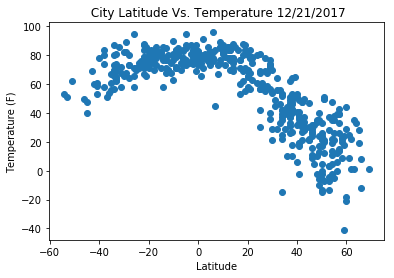

In [12]:
plt.show()

In [13]:
# plting lat and humidity
plt.scatter(cities_sample['latitude'], cities_sample['humidity'])
plt.title(f"City Latitude Vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")

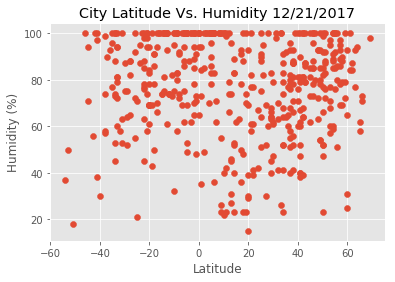

In [14]:
plt.show()

In [15]:
# plting lat and cloudiness 
plt.scatter(cities_sample['latitude'], cities_sample['cloudiness'])
plt.title(f"City Latitude Vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")

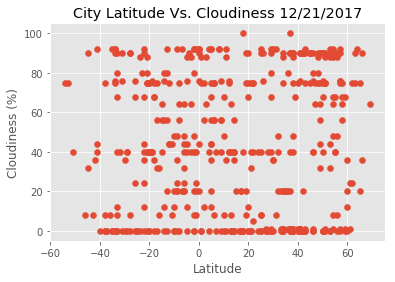

In [16]:
plt.show()

In [17]:
# plting lat and windspeed
plt.scatter(cities_sample['latitude'], cities_sample['wind_speed'])
plt.title(f"City Latitude Vs. Wend Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")

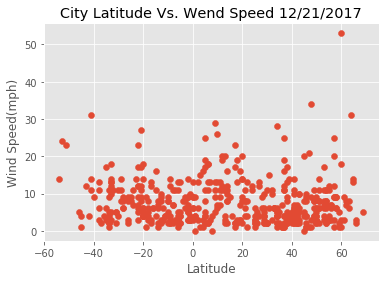

In [18]:
plt.show()